# Introduction

This notebook aims to computationally describe the properties of p-type, silicon semiconductors.

In [2]:
import random
from matplotlib import pyplot as plt
from matplotlib import animation as animation
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Carrier Diffusion

Minority charge carriers in a semiconductor can be treated in the same way as gases do in thermal physics. This is because they are indistinguishable, large in quantity and have random motion.

Electrons, behaving like gases, will also diffuse from a region of high to low concentration. For each electron, their motion can be displayed as follows:

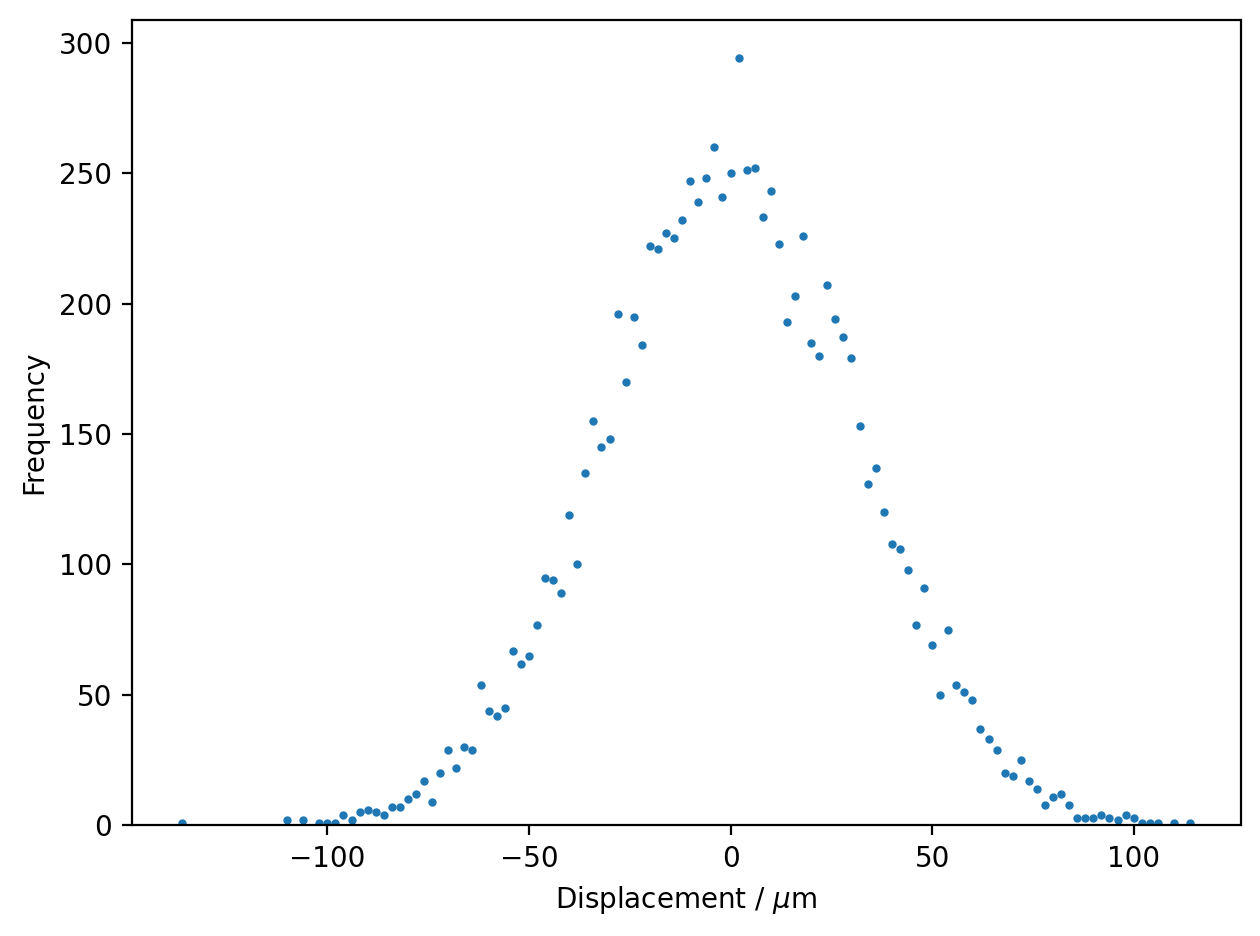

In [3]:
def random_walk():
    walker = 0
    final_positions = []

    for _ in range(10000):
        for _ in range(1000):
            match random.randint(0, 1):
                case 0:
                    walker -= 1
                
                case 1:
                    walker += 1
            
        final_positions.append(walker)
        walker = 0

    count_positions = {}
    for i in range(min(final_positions), max(final_positions)+1):
        if final_positions.count(i) > 0:
            count_positions[i] = final_positions.count(i)

    plt.plot(
        count_positions.keys(),
        count_positions.values(),
        ls="None",
        marker=".",
        markersize=4
    )

    plt.xlabel("Displacement / $\mu$m")
    plt.ylabel("Frequency")


    plt.ylim(ymin=0)

    plt.tight_layout()
    plt.show()

random_walk()

# Using the Diffusion Equation
Is this the same as the diffusion of the electrons? The 1D time-dependent diffusion equation is

\begin{equation}
P(x, t) = A(t)e^{-\frac{x^{2}}{4Dt}},
\end{equation}

but what does this look like graphically?

C:\Users\resul\AppData\Local\Temp\ipykernel_7436\3203932339.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  normaliser = lambda t: (np.sqrt(4*np.pi*D*t)) **-1
C:\Users\resul\AppData\Local\Temp\ipykernel_7436\3203932339.py:22: RuntimeWarning: divide by zero encountered in divide
  diffusion_1d = lambda x, t: np.exp(-(x - v*t)**2 / (4*D*t))
C:\Users\resul\AppData\Local\Temp\ipykernel_7436\3203932339.py:34: RuntimeWarning: invalid value encountered in multiply
  ylist = np.where(tval == 0, xlist * 0, normaliser(tval) * diffusion_1d(xlist, tval))


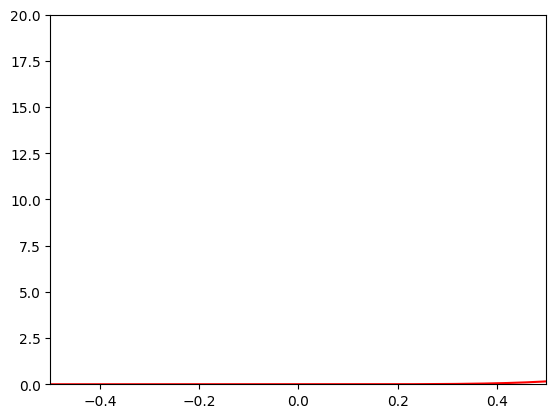

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from matplotlib.animation import FFMpegWriter
plt.rcParams["animation.ffmpeg_path"] = "C:\\ffmpeg\\bin\\ffmpeg.exe"

MOBILITY = 1e-1
K = 1.38e-23
T = 300
Q = 1.6e-19

v = 0.1

D = (MOBILITY*K*T)/Q

fig = plt.figure()
l, = plt.plot([], [], ls="-", color="red")

plt.xlim(-0.5, 0.5)
plt.ylim(0, 20)

diffusion_1d = lambda x, t: np.exp(-(x - v*t)**2 / (4*D*t))
normaliser = lambda t: (np.sqrt(4*np.pi*D*t)) **-1

metadata = dict(title="Diffusion", artist="Resul Teymuroglu")
writer = FFMpegWriter(fps=100, metadata=metadata)

xlist = np.linspace(-1, 1, 1000)
ylist = np.zeros(1000)

with writer.saving(fig, "diffusion.mp4", 100):
    for tval in np.linspace(0, 10, 1000):
        # print(tval)
        ylist = np.where(tval == 0, xlist * 0, normaliser(tval) * diffusion_1d(xlist, tval))

        l.set_data(xlist, ylist)
        writer.grab_frame()
        ylist = np.array([])